In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_df=pd.read_csv("/content/Minor.csv")

In [ ]:
data_df.head()

,"Treatment (0=Placebo, 1=Progabide)",Age,Difference in frequencies,Intensity of disease
0,0,31,0.375,4
1,0,30,0.375,4
2,0,25,0.625,4
3,0,36,0.625,4
4,0,22,-1.375,2


In [ ]:

x=data_df.drop(['Intensity of disease'],axis=1).values
y=data_df['Intensity of disease'].values

In [ ]:
print(x)

[[ 0.    31.     0.375]
 [ 0.    30.     0.375]
 [ 0.    25.     0.625]
 [ 0.    36.     0.625]
 [ 0.    22.    -1.375]
 [ 0.    29.    -0.625]
 [ 0.    31.     0.   ]
 [ 0.    36.     5.375]
 [ 0.    37.    -0.125]
 [ 0.    28.     2.875]
 [ 0.    36.     1.75 ]
 [ 0.    24.    -0.25 ]
 [ 0.    28.    -0.25 ]
 [ 0.    36.     0.   ]
 [ 0.    26.    -3.5  ]
 [ 0.    26.    -4.25 ]
 [ 0.    28.    -1.5  ]
 [ 0.    31.     1.5  ]
 [ 0.    32.    -0.375]
 [ 0.    21.    -0.5  ]
 [ 0.    29.     0.25 ]
 [ 0.    21.     0.625]
 [ 0.    32.    -0.5  ]
 [ 0.    25.     0.25 ]
 [ 0.    30.    11.   ]
 [ 0.    40.    -0.375]
 [ 0.    19.     0.   ]
 [ 0.    22.     0.75 ]
 [ 1.    18.    -4.25 ]
 [ 1.    32.    -1.25 ]
 [ 1.    20.    -1.5  ]
 [ 1.    20.     0.375]
 [ 1.    18.     0.   ]
 [ 1.    24.    -1.625]
 [ 1.    30.     5.375]
 [ 1.    35.     0.75 ]
 [ 1.    57.    -0.125]
 [ 1.    20.    -5.375]
 [ 1.    22.    -1.5  ]
 [ 1.    28.    -0.375]
 [ 1.    23.    -2.   ]
 [ 1.    40.    

In [ ]:
print(y)

[4 4 4 4 2 3 4 6 3 5 5 3 3 4 1 1 2 5 3 3 4 4 3 4 7 3 4 4 6 2 2 4 4 2 6 3 3
 1 2 3 2 3 5 2 4 4 3 3 7 2 2 2 4 2 3 6 2 2 3]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=ml.predict(x_test)
print(y_pred)

[3.64897148 3.34576147 4.74408632 3.5764498  3.19162532 2.87289022
 2.76485826 3.49676603 2.86662878 3.44693154 2.88065276 3.75700343
 3.3485911  3.22803626 3.54750118 3.97396801 3.5406393  3.0789624 ]


In [ ]:
ml.predict([[0,31,0.375]])

array([3.64897148])

In [ ]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred, squared=False)
errors

0.6969746112347806

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5687927418610875

Text(0.5, 1.0, 'Actual vs Predicted')

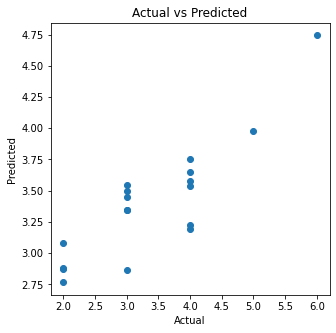

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')